In [1]:
import tensorflow as tf

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
model = tf.keras.models.load_model('sales_prediction_model')
model.summary()

2024-01-22 20:00:35.441466: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-01-22 20:00:35.441487: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-01-22 20:00:35.441494: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-01-22 20:00:35.441525: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-22 20:00:35.441539: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 150)               22650     
                                                                 
 reshape_1 (Reshape)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 128)            142848    
                                                                 
 dense_6 (Dense)             (None, 1, 64)             8256      
                                                                 
 dense_7 (Dense)             (None, 1, 32)             2080      
                                                                 
 lstm_3 (LSTM)               (None, 16)                3136      
                                                                 
 dense_8 (Dense)             (None, 4)                

In [15]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

In [16]:
df = pd.read_csv('../../datasets/testing_dataset.csv')
df.head(3)

,Unnamed: 0,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 colour pepper,Item Name_agaricus bisporus,Item Name_aihao,Item Name_amaranth,Item Name_apricot bao mushroom,Item Name_basil,Item Name_bell pepper,...,Item Name_yuxingcao,Item Name_zhijiang red bolt,Item Name_zhimaxiancai,Item Name_zhuyecai,Category Name_aquatic,Category Name_cabbage,Category Name_capsicum,Category Name_flower,Category Name_mushroom,Category Name_solanum
0,0,0.240400,18.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,0.277500,12.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2,0.434167,19.8,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [17]:
df = df.drop(['Unnamed: 0'], axis=1)
y = df['Quantity Sold (kilo)']
x = df.drop(['Quantity Sold (kilo)'], axis=1)
x_test_tensor = tf.constant(x, dtype=tf.float32)
y_test_tensor = tf.constant(y, dtype=tf.float32)

pred = model.predict(x_test_tensor)

mean_absolute_error(y_test_tensor, pred)

37/37 [==============================] - 0s 6ms/step


0.09707108

In [20]:
import matplotlib.pyplot as plt

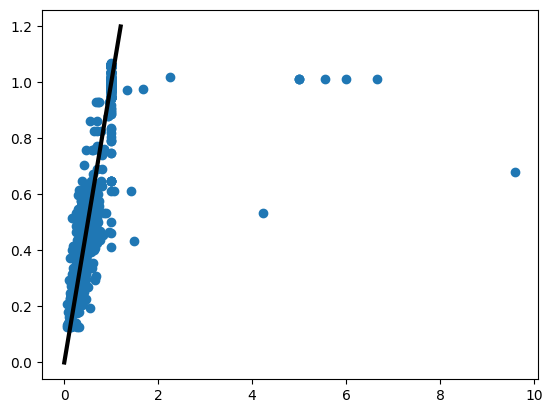

In [26]:
x = [0 , 1.2]
y = x

plt.scatter(y_test_tensor, pred)
plt.plot(x, y, color='black', linewidth=3)